# <font color="#8333ff">TP : Pratiquez la régression linéaire multiple sur le jeu de données de l'ozone</font>

Appliquons la régression linéaire multiple à l'échantillon ozone.
Modélisons le pic d'ozone journalier en fonction de toutes les autres variables météorologiques.

## Importez les données

On importe les librairies qui nous permettront de mener à bien ce TP :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
from functions import *

On importe les données, puis on utilise la commande  lm  pour régresser maxO3 en fonction des autres variables de l'échantillon.

In [2]:
ozone = pd.read_csv('ozone.txt', sep=";", decimal=',')

reg_multi = smf.ols('maxO3~T9+T12+T15+Ne9+Ne12+Ne15+maxO3v', data=ozone).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     45.68
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           6.06e-29
Time:                        10:29:45   Log-Likelihood:                -453.71
No. Observations:                 112   AIC:                             923.4
Df Residuals:                     104   BIC:                             945.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.7055     13.109      0.969      0.3

On constate ici que certains paramètres ne sont pas significativement différents de 0, car leur p-valeur n'est pas inférieure à 5 %, le niveau de test que nous souhaitons.

Le $R^{2}$ vaut environ 0.75, et le $R^{2}$ ajusté est d'environ 0.74.

*Cette valeur est plus élevée qu'en régression linéaire simple, et c'est logique, car lorsque l'on rajoute des variables explicatives potentielles, on accroît naturellement la valeur de ces $R^{2}$.*

## Retirez les variables non significatives

On va donc maintenant retirer les variables non significatives. On commence par la moins significative : Ne15, car elle a une p-valeur de 0.93.

In [3]:
reg_multi = smf.ols('maxO3~T9+T12+T15+Ne9+Ne12+maxO3v', data=ozone).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     53.80
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           7.91e-30
Time:                        10:29:48   Log-Likelihood:                -453.71
No. Observations:                 112   AIC:                             921.4
Df Residuals:                     105   BIC:                             940.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8492     12.950      0.992      0.3

On voit alors que c'est maintenant Ne12, avec une p-valeur de 0.79, qui est la moins significative. On l'enlève donc.

In [4]:
reg_multi = smf.ols('maxO3~T9+T12+T15+Ne9+maxO3v', data=ozone).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     65.11
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           9.62e-31
Time:                        10:29:50   Log-Likelihood:                -453.75
No. Observations:                 112   AIC:                             919.5
Df Residuals:                     106   BIC:                             935.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2844     11.534      0.978      0.3

On constate qu'il faut maintenant retirer la variable T9 :  

In [5]:
reg_multi = smf.ols('maxO3~T12+T15+Ne9+maxO3v', data=ozone).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     81.55
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           1.33e-31
Time:                        10:29:52   Log-Likelihood:                -454.06
No. Observations:                 112   AIC:                             918.1
Df Residuals:                     107   BIC:                             931.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1368     11.168      0.818      0.4

Et l'on retire ensuite T15 :

In [6]:
reg_multi = smf.ols('maxO3~T12+Ne9+maxO3v', data=ozone).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     109.1
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           1.46e-32
Time:                        10:29:53   Log-Likelihood:                -454.30
No. Observations:                 112   AIC:                             916.6
Df Residuals:                     108   BIC:                             927.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7622     11.100      0.879      0.3

On remarque qu'à présent, tous les paramètres sont significatifs. Quant au $R^{2}$, il vaut environ 0.75, tout comme le $R^{2}$ ajusté.

*On peut donc utiliser ce modèle à des fins de prévision !*

Si l'on souhaite prévoir la concentration journalière en ozone, sachant que la température prévue à 12 h sera de 15 °C, que la valeur de Ne9 sera de 2, et que la concentration maxO3v de la veille vaut 100, alors on saisit les lignes suivantes :

In [7]:
a_prevoir = pd.DataFrame({'T12': 15, 'Ne9': 2, 'maxO3v': 100}, index=[0])
maxO3_prev = reg_multi.predict(a_prevoir)
print(round(maxO3_prev[0], 2))

84.08


On obtient une concentration maxO3 de 84.

## Pour aller plus loin : analysez vos résultats

Reprenons la régression linéaire multiple que nous avons obtenue :

In [8]:
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     109.1
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           1.46e-32
Time:                        10:29:57   Log-Likelihood:                -454.30
No. Observations:                 112   AIC:                             916.6
Df Residuals:                     108   BIC:                             927.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7622     11.100      0.879      0.3

Nous allons ici réaliser les tests à un niveau $\alpha=5$% :

In [9]:
alpha = 0.05

Récupérons $n$, le nombre d'individus de l'échantillon, et $p$, le nombre de variables.

In [10]:
n = ozone.shape[0]
p = 4

Nous allons mener des analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appelé  analyses.

In [11]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float', inplace=True)

## Calculez les leviers

On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de $2∗\frac{p}{n}$.

In [12]:
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

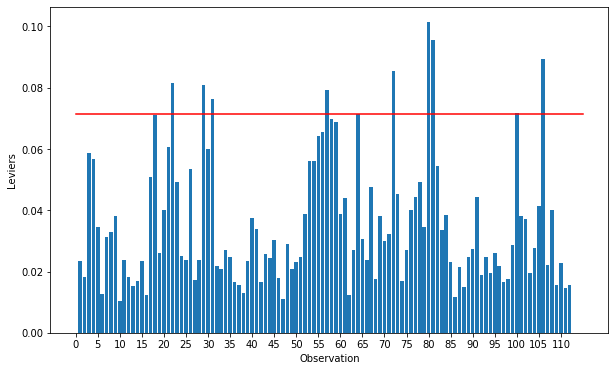

In [13]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 115, step=5))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 115], [seuil_levier, seuil_levier], color='r')
plt.show()

Pour sélectionner les points pour lesquels le levier est supérieur au seuil, on exécute la ligne suivante :

In [14]:
analyses.loc[analyses['levier'] > seuil_levier, :]

,obs,levier
21,22,0.081663
28,29,0.080777
30,31,0.076282
56,57,0.079123
71,72,0.085491
79,80,0.101387
80,81,0.095683
99,100,0.071728
105,106,0.089376


## Calculez les résidus studentisés

Si l'on souhaite maintenant calculer les résidus studentisés, nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

In [19]:
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

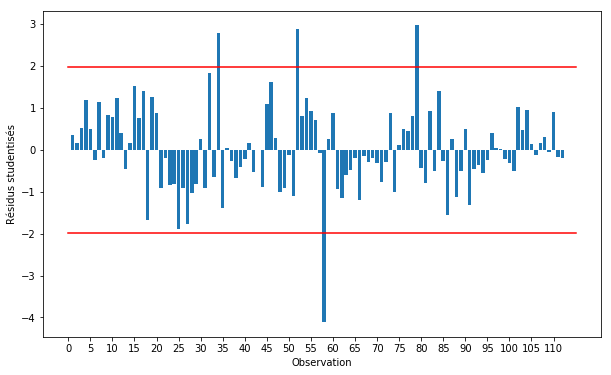

In [16]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 115, step=5))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 115], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 115], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

## Déterminez la distance de Cook

Pour trouver la distance de Cook, nous exécutons ceci :

In [17]:
influence = reg_multi.get_influence().summary_frame()

Le seuil de la distance de Cook est de n-p. 

In [18]:
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

On peut détecter les observations influentes comme ceci :

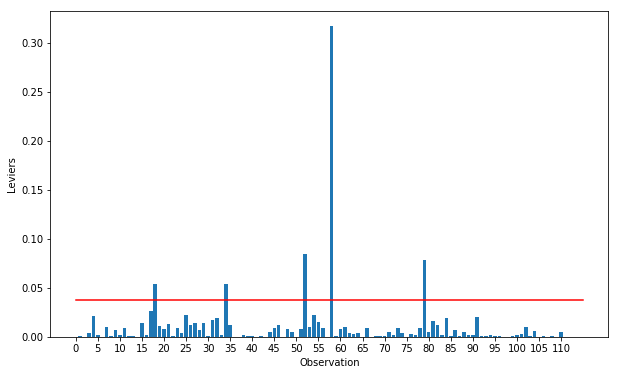

In [19]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 115, step=5))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 115], [seuil_dcook, seuil_dcook], color='r')
plt.show()

On ne retire des points qu'après avoir vérifié qu'ils sont effectivement atypiques, voire aberrants, au vu du modèle estimé.

## Vérifier la colinéarité des variables

Une autre chose à vérifier est l'éventuelle colinéarité approchée des variables :

In [20]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[2.0678328061249003, 1.5277727396873015, 1.4747178841142814]

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

## Testez l’homoscédasticité

On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [21]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.07865197865995636


La p-valeur ici n'est pas inférieure à $5$%, on ne rejette pas l'hypothèse $H0$ selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

## Testez la normalité des résidus

Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.

In [22]:
shapiro(reg_multi.resid)

(0.9623235464096069, 0.0030248425900936127)

Ici, l'hypothèse de normalité est remise en cause (p-value = 0.003 < 0.05).

Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que **les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes**, même si le résidu n'est pas considéré comme étant gaussien.

Nous aurions pu aussi sélectionner automatiquement un modèle avec l'ensemble des variables à disposition (variables météo et pic d'ozone de la veille) :

In [23]:
columns = ['maxO3','T9','T12','T15','Ne9','Ne12','Ne15','maxO3v']
reg_backward = backward_selected(ozone[columns], 'maxO3')

_______________________________
maxO3 ~ T9 + T12 + Ne12 + T15 + maxO3v + Ne15 + Ne9 + 1
remove Ne15 (p-value : 0.928 )

_______________________________
maxO3 ~ T9 + T12 + Ne12 + T15 + maxO3v + Ne9 + 1
remove Ne12 (p-value : 0.787 )

_______________________________
maxO3 ~ T9 + T12 + T15 + maxO3v + Ne9 + 1
remove T15 (p-value : 0.481 )

_______________________________
maxO3 ~ T9 + T12 + maxO3v + Ne9 + 1
remove T9 (p-value : 0.466 )

_______________________________
maxO3 ~ T12 + maxO3v + Ne9 + 1
is the final model !

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     109.1
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           1.46e-32
Time:                        14:02:25   Log-Likelihood:                -454.30
No. O

*Et voilà, vous avez vu en pratique comment réaliser une régression linéaire multiple pour déterminer et prédire la concentration d'ozone dans l'atmosphère. Dans la prochaine partie, vous aborderez le modèle de régression logistique.*